In [157]:
import pandas as pd
import matplotlib as plt

In [158]:
logins = pd.read_json('../logins.json', orient='values')

In [159]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [160]:
logins['login_count'] = 1

In [161]:
logins.set_index(pd.to_datetime(logins['login_time']), inplace=True)

In [162]:
logins_15 = logins.resample('15min').sum()

In [163]:
logins_15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [164]:
logins_15.reset_index(inplace=True)

In [165]:
logins_15.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [166]:
logins_15['month'] = logins_15['login_time'].dt.month
logins_15['day'] = logins_15['login_time'].dt.day
logins_15['hour'] = logins_15['login_time'].dt.hour
logins_15['minute'] = logins_15['login_time'].dt.minute

In [167]:
logins_15.head()

,login_time,login_count,month,day,hour,minute
0,1970-01-01 20:00:00,2,1,1,20,0
1,1970-01-01 20:15:00,6,1,1,20,15
2,1970-01-01 20:30:00,9,1,1,20,30
3,1970-01-01 20:45:00,7,1,1,20,45
4,1970-01-01 21:00:00,1,1,1,21,0


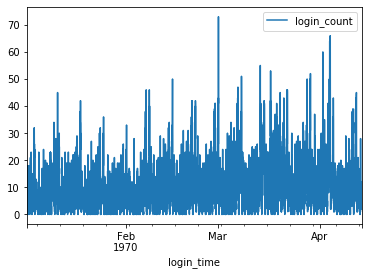

In [168]:
logins_15.plot(x='login_time', y='login_count')

In [169]:
logins_15[logins_15['login_count'] >= 50].head(100)

,login_time,login_count,month,day,hour,minute
4259,1970-02-15 04:45:00,50,2,15,4,45
5602,1970-03-01 04:30:00,73,3,1,4,30
6275,1970-03-08 04:45:00,51,3,8,4,45
6825,1970-03-13 22:15:00,55,3,13,22,15
7126,1970-03-17 01:30:00,53,3,17,1,30
8194,1970-03-28 04:30:00,50,3,28,4,30
8281,1970-03-29 02:15:00,50,3,29,2,15
8291,1970-03-29 04:45:00,52,3,29,4,45
8654,1970-04-01 23:30:00,60,4,1,23,30
8843,1970-04-03 22:45:00,50,4,3,22,45


In [170]:
logins_15.describe()

,login_count,month,day,hour,minute
count,9788.000000,9788.000000,9788.000000,9788.000000,9788.000000
mean,9.515938,2.259093,14.569268,11.496935,22.500000
std,8.328818,1.017219,8.683342,6.922294,16.771367
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,1.000000,7.000000,5.000000,11.250000
50%,7.000000,2.000000,14.000000,11.000000,22.500000
75%,13.000000,3.000000,22.000000,17.000000,33.750000
max,73.000000,4.000000,31.000000,23.000000,45.000000


In [171]:
logins_15_month = logins_15[logins_15['month'] == 3]

In [172]:
logins_15_month.head()

,login_time,login_count,month,day,hour,minute
5584,1970-03-01 00:00:00,16,3,1,0,0
5585,1970-03-01 00:15:00,19,3,1,0,15
5586,1970-03-01 00:30:00,17,3,1,0,30
5587,1970-03-01 00:45:00,12,3,1,0,45
5588,1970-03-01 01:00:00,20,3,1,1,0


In [173]:
logins_15_month.describe()

,login_count,month,day,hour,minute
count,2976.000000,2976.0,2976.000000,2976.00000,2976.000000
mean,11.331653,3.0,16.000000,11.50000,22.500000
std,9.335820,0.0,8.945775,6.92335,16.773328
min,0.000000,3.0,1.000000,0.00000,0.000000
25%,4.000000,3.0,8.000000,5.75000,11.250000
50%,9.000000,3.0,16.000000,11.50000,22.500000
75%,16.000000,3.0,24.000000,17.25000,33.750000
max,73.000000,3.0,31.000000,23.00000,45.000000


In [174]:
logins_15_week = logins_15_month[logins_15_month['day'] >= 1]
logins_15_week = logins_15_month[logins_15_month['day'] <= 7]

In [175]:
logins_15_week.head()

,login_time,login_count,month,day,hour,minute
5584,1970-03-01 00:00:00,16,3,1,0,0
5585,1970-03-01 00:15:00,19,3,1,0,15
5586,1970-03-01 00:30:00,17,3,1,0,30
5587,1970-03-01 00:45:00,12,3,1,0,45
5588,1970-03-01 01:00:00,20,3,1,1,0


In [176]:
logins_15_week.describe()

,login_count,month,day,hour,minute
count,672.000000,672.0,672.00000,672.000000,672.000000
mean,10.769345,3.0,4.00000,11.500000,22.500000
std,9.320366,0.0,2.00149,6.927343,16.783002
min,0.000000,3.0,1.00000,0.000000,0.000000
25%,4.000000,3.0,2.00000,5.750000,11.250000
50%,8.000000,3.0,4.00000,11.500000,22.500000
75%,16.000000,3.0,6.00000,17.250000,33.750000
max,73.000000,3.0,7.00000,23.000000,45.000000


In [177]:
logins_15_day = logins_15_month[logins_15_month['day'] == 5]

In [178]:
logins_15_day.head(100)

,login_time,login_count,month,day,hour,minute
5968,1970-03-05 00:00:00,16,3,5,0,0
5969,1970-03-05 00:15:00,12,3,5,0,15
5970,1970-03-05 00:30:00,17,3,5,0,30
5971,1970-03-05 00:45:00,12,3,5,0,45
5972,1970-03-05 01:00:00,20,3,5,1,0
...,...,...,...,...,...,...
6059,1970-03-05 22:45:00,32,3,5,22,45
6060,1970-03-05 23:00:00,26,3,5,23,0
6061,1970-03-05 23:15:00,14,3,5,23,15
6062,1970-03-05 23:30:00,18,3,5,23,30


In [179]:
logins_15_day.describe()

,login_count,month,day,hour,minute
count,96.000000,96.0,96.0,96.000000,96.000000
mean,9.520833,3.0,5.0,11.500000,22.500000
std,7.371323,0.0,0.0,6.958524,16.858545
min,0.000000,3.0,5.0,0.000000,0.000000
25%,4.000000,3.0,5.0,5.750000,11.250000
50%,8.500000,3.0,5.0,11.500000,22.500000
75%,14.000000,3.0,5.0,17.250000,33.750000
max,32.000000,3.0,5.0,23.000000,45.000000


In [180]:
logins_15_day_weekend = logins_15_month[logins_15_month['day'] == 8]

In [181]:
logins_15_day_weekend.head(100)

,login_time,login_count,month,day,hour,minute
6256,1970-03-08 00:00:00,23,3,8,0,0
6257,1970-03-08 00:15:00,18,3,8,0,15
6258,1970-03-08 00:30:00,20,3,8,0,30
6259,1970-03-08 00:45:00,24,3,8,0,45
6260,1970-03-08 01:00:00,24,3,8,1,0
...,...,...,...,...,...,...
6347,1970-03-08 22:45:00,11,3,8,22,45
6348,1970-03-08 23:00:00,8,3,8,23,0
6349,1970-03-08 23:15:00,9,3,8,23,15
6350,1970-03-08 23:30:00,3,3,8,23,30


In [182]:
logins_15_day_weekend.describe()

,login_count,month,day,hour,minute
count,96.000000,96.0,96.0,96.000000,96.000000
mean,14.937500,3.0,8.0,11.500000,22.500000
std,10.760368,0.0,0.0,6.958524,16.858545
min,0.000000,3.0,8.0,0.000000,0.000000
25%,7.750000,3.0,8.0,5.750000,11.250000
50%,11.500000,3.0,8.0,11.500000,22.500000
75%,21.000000,3.0,8.0,17.250000,33.750000
max,51.000000,3.0,8.0,23.000000,45.000000


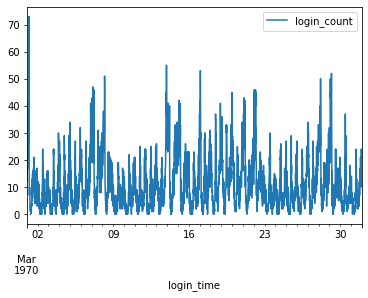

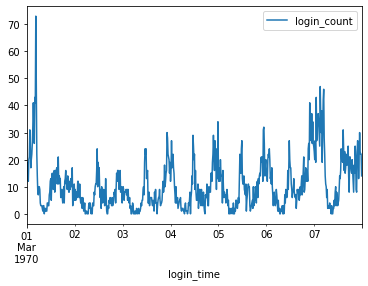

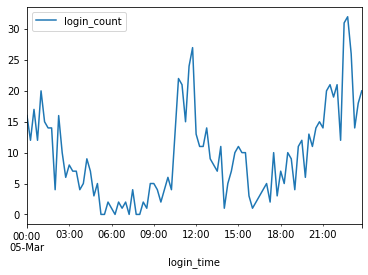

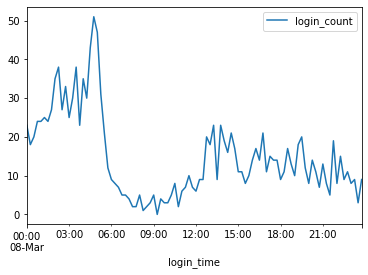

In [183]:
logins_15_month.plot(x='login_time', y='login_count')
logins_15_week.plot(x='login_time', y='login_count')
logins_15_day.plot(x='login_time', y='login_count')
logins_15_day_weekend.plot(x='login_time', y='login_count')